### PCA on marks dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("marks.csv")
data.head()

,Student,English,Math,Science
0,1,99,96,97
1,2,99,96,97
2,3,98,97,97
3,4,95,100,95
4,5,95,96,96


In [3]:
from sklearn.preprocessing import StandardScaler
variables = ['English', 'Math', 'Science']
data = data.loc[:, variables].values
data = StandardScaler().fit_transform(data)
data = pd.DataFrame(data)
data.head()

,0,1,2
0,0.940516,0.806680,0.905585
1,0.940516,0.806680,0.905585
2,0.888120,0.857256,0.905585
3,0.730930,1.008983,0.797777
4,0.730930,0.806680,0.851681


In [4]:
from sklearn.decomposition import PCA
pca = PCA()
data_pca = pca.fit_transform(data)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2
0,-1.531454,0.027442,0.096350
1,-1.531454,0.027442,0.096350
2,-1.530489,-0.011299,0.034694
3,-1.465405,-0.052520,-0.196427
4,-1.379480,-0.085542,-0.008389


In [5]:
print("Explained variance:", pca.explained_variance_)
print("Proportion of variance explained:", pca.explained_variance_ratio_)

Explained variance: [3.11208291 0.02876168 0.01705015]
Proportion of variance explained: [0.98549292 0.00910786 0.00539921]


In [6]:
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Cumulative Prop. Variance Explained:  [0.98549292 0.99460079 1.        ]


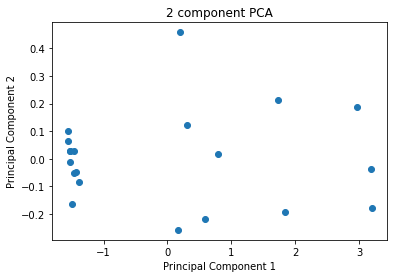

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')
ax.scatter(data_pca[0], data_pca[1])

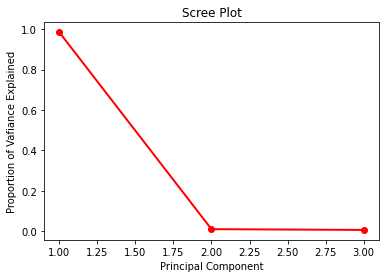

In [8]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Vafiance Explained')
plt.show()

In [9]:
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3'], 
                        index = data.columns )
print(loadings)

        PC1       PC2       PC3
0 -0.576753  0.718007  0.389644
1 -0.578440 -0.022133 -0.815425
2 -0.576856 -0.695684  0.428089
